***Advanced Customer and Order Analytics Using Python***

Import Necessary Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Load Datasets

In [69]:
customers = pd.read_csv("/content/CustomersWS.csv")
customers

,CustomerID,Name,Phone,Address,City
0,1,Kavya Reddy,9193214172,"Koramangala, Delhi",Mumbai
1,2,Siddharth Joshi,1628503012,"Civil Lines, Jaipur",Pune
2,3,Neha Joshi,6430427670,"Civil Lines, Hyderabad",Jaipur
3,4,Siddharth Mehta,2645852001,"MG Road, Jaipur",Jaipur
4,5,Rajesh Reddy,2428071930,"Koramangala, Pune",Ahmedabad
...,...,...,...,...,...
295,296,Rohit Sharma,6671028571,"Gachibowli, Bangalore",Jaipur
296,297,Siddharth Joshi,6721377969,"Malviya Nagar, Pune",Jaipur
297,298,Aarav Sharma,6633244842,"Andheri West, Ahmedabad",Ahmedabad
298,299,Pooja Gupta,8413555089,"Civil Lines, Delhi",Delhi


In [70]:
orders = pd.read_csv("/content/OrdersWS.csv")
orders

,OrderID,CustomerID,OrderDateTime,DeliveryDateTime,TotalAmount,DeliveryStatus
0,1,17,2024-11-17 22:12:56,2024-11-17 22:27:56,113,Delivered
1,2,71,2024-11-13 10:52:56,2024-11-13 11:03:56,1170,Delivered
2,3,2,2024-10-25 03:06:56,2024-10-25 03:17:56,837,Delivered
3,4,155,2024-10-13 20:52:56,2024-10-13 21:05:56,357,Delivered
4,5,270,2024-10-22 05:01:56,2024-10-22 05:12:56,410,Delivered
...,...,...,...,...,...,...
3995,3996,163,2024-11-15 17:59:56,2024-11-15 18:16:56,1130,Delivered
3996,3997,13,2024-11-09 10:02:56,2024-11-09 10:18:56,670,Delivered
3997,3998,97,2024-11-10 22:47:56,2024-11-10 22:58:56,950,Delivered
3998,3999,273,2024-09-30 22:37:56,2024-09-30 22:45:56,778,Delivered


In [71]:
order_details = pd.read_csv("/content/OrderDetailsWS.csv")
order_details

,OrderDetailsID,OrderID,ProductName,Quantity,PricePerUnit
0,1,2262,Clinic Plus Shampoo,1,99
1,2,115,Maggi Noodles,5,120
2,3,3872,Harpic Toilet Cleaner,4,300
3,4,3489,Ariel Detergent,5,99
4,5,1717,Bournvita,3,99
...,...,...,...,...,...
9995,9996,1240,Good Day Cookies,5,80
9996,9997,946,Parle-G Biscuits,1,130
9997,9998,2576,Maggi Noodles,2,35
9998,9999,2336,Fortune Oil,1,99


Inspect Dataset Structure

In [72]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  300 non-null    int64 
 1   Name        300 non-null    object
 2   Phone       300 non-null    int64 
 3   Address     300 non-null    object
 4   City        300 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.8+ KB


In [73]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   OrderID           4000 non-null   int64 
 1   CustomerID        4000 non-null   int64 
 2   OrderDateTime     4000 non-null   object
 3   DeliveryDateTime  3924 non-null   object
 4   TotalAmount       4000 non-null   int64 
 5   DeliveryStatus    4000 non-null   object
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [74]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderDetailsID  10000 non-null  int64 
 1   OrderID         10000 non-null  int64 
 2   ProductName     10000 non-null  object
 3   Quantity        10000 non-null  int64 
 4   PricePerUnit    10000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 390.8+ KB


Check for Missing Values

In [75]:
customers.isnull().sum()

,0
CustomerID,0
Name,0
Phone,0
Address,0
City,0


In [76]:
orders.isnull().sum()

,0
OrderID,0
CustomerID,0
OrderDateTime,0
DeliveryDateTime,76
TotalAmount,0
DeliveryStatus,0


In [77]:
order_details.isnull().sum()

,0
OrderDetailsID,0
OrderID,0
ProductName,0
Quantity,0
PricePerUnit,0


Check for Duplicate Records

In [78]:
print("Customers:", customers.duplicated().sum())
print("Orders:", orders.duplicated().sum())
print("Order Details:", order_details.duplicated().sum())

Customers: 0
Orders: 0
Order Details: 0


Customer Distribution by City

In [79]:
city_count = customers.groupby("City")["CustomerID"].count().sort_values(ascending=False)
print(city_count)

City
Jaipur       49
Hyderabad    48
Mumbai       47
Ahmedabad    46
Pune         39
Delhi        37
Bangalore    34
Name: CustomerID, dtype: int64


Merge Orders with Customer Info

In [80]:
df_orders_customers = pd.merge(orders, customers, on="CustomerID", how="inner")
df_orders_customers

,OrderID,CustomerID,OrderDateTime,DeliveryDateTime,TotalAmount,DeliveryStatus,Name,Phone,Address,City
0,1,17,2024-11-17 22:12:56,2024-11-17 22:27:56,113,Delivered,Rohit Pandey,4625735153,"Malviya Nagar, Delhi",Delhi
1,2,71,2024-11-13 10:52:56,2024-11-13 11:03:56,1170,Delivered,Pooja Joshi,7598229457,"Civil Lines, Delhi",Ahmedabad
2,3,2,2024-10-25 03:06:56,2024-10-25 03:17:56,837,Delivered,Siddharth Joshi,1628503012,"Civil Lines, Jaipur",Pune
3,4,155,2024-10-13 20:52:56,2024-10-13 21:05:56,357,Delivered,Rajesh Singh,468292990,"Malviya Nagar, Jaipur",Hyderabad
4,5,270,2024-10-22 05:01:56,2024-10-22 05:12:56,410,Delivered,Ananya Gupta,4195752139,"Civil Lines, Hyderabad",Ahmedabad
...,...,...,...,...,...,...,...,...,...,...
3995,3996,163,2024-11-15 17:59:56,2024-11-15 18:16:56,1130,Delivered,Rajesh Khan,6903961149,"Satellite, Hyderabad",Ahmedabad
3996,3997,13,2024-11-09 10:02:56,2024-11-09 10:18:56,670,Delivered,Aarav Sharma,9412974585,"Koramangala, Jaipur",Hyderabad
3997,3998,97,2024-11-10 22:47:56,2024-11-10 22:58:56,950,Delivered,Pooja Mehta,2978712294,"Satellite, Hyderabad",Jaipur
3998,3999,273,2024-09-30 22:37:56,2024-09-30 22:45:56,778,Delivered,Rajesh Sharma,1080118875,"MG Road, Hyderabad",Jaipur


Analyze Revenue by Delivery Status

In [81]:
status_revenue = df_orders_customers.groupby("DeliveryStatus")["TotalAmount"].sum().reset_index()
status_revenue

,DeliveryStatus,TotalAmount
0,Cancelled,63304
1,Delivered,3157184


Visualize Revenue by Delivery Status

<ipython-input-82-648b90759972>:3: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



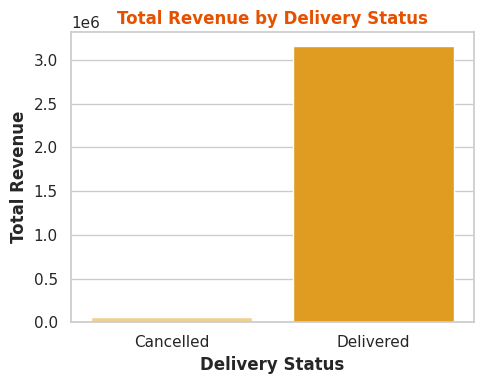

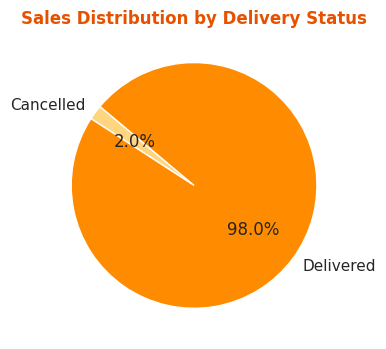

In [82]:
orange_palette = ["#FFD580", "#FFA500", "#FF8C00", "#E65100"]
plt.figure(figsize=(5, 4))
sns.barplot(
    x='DeliveryStatus',
    y='TotalAmount',
    data=status_revenue,
    hue='DeliveryStatus',
    palette=orange_palette,
    legend=False
)
plt.title("Total Revenue by Delivery Status", fontweight='bold', color='#E65100')
plt.xlabel("Delivery Status", fontweight='bold')
plt.ylabel("Total Revenue", fontweight='bold')
plt.tight_layout()
plt.show()
pie_colors = ["#FFD580", "#FF8C00"]
plt.figure(figsize=(4, 4))
plt.pie(
    status_revenue['TotalAmount'],
    labels=status_revenue['DeliveryStatus'],
    autopct='%1.1f%%',
    colors=pie_colors,
    startangle=140
)
plt.title("Sales Distribution by Delivery Status", fontweight='bold', color='#E65100')
plt.tight_layout()
plt.show()

Analyze Revenue by City and Status

In [83]:
revenue_city = df_orders_customers.groupby(["City", "DeliveryStatus"]).agg({"OrderID": "count", "TotalAmount": "sum"})
revenue_city

OrderID  TotalAmount
City      DeliveryStatus                      
Ahmedabad Cancelled             6         6578
          Delivered           592       475208
Bangalore Cancelled             9         5960
          Delivered           466       373445
Delhi     Cancelled            15        13225
          Delivered           486       383151
Hyderabad Cancelled            11         9541
          Delivered           620       512445
Jaipur    Cancelled            16        11799
          Delivered           642       515888
Mumbai    Cancelled             8         7303
          Delivered           618       504781
Pune      Cancelled            11         8898
          Delivered           500       392266

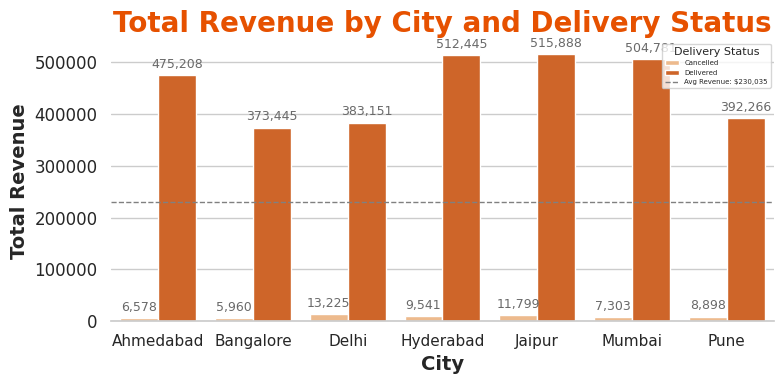

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
revenue_city_reset = revenue_city.reset_index()
orange_palette = sns.color_palette("Oranges", n_colors=revenue_city_reset["DeliveryStatus"].nunique())

plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid")
ax = sns.barplot(
    data=revenue_city_reset,
    x="City",
    y="TotalAmount",
    hue="DeliveryStatus",
    palette=orange_palette
)
plt.title("Total Revenue by City and Delivery Status", fontsize=20, fontweight='bold', color='#E65100')
plt.xlabel("City", fontsize=14, fontweight='bold')
plt.ylabel("Total Revenue", fontsize=14, fontweight='bold')
plt.yticks(fontsize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge', fontsize=9, padding=3, color='dimgray')
average_revenue = revenue_city["TotalAmount"].mean().mean()
plt.axhline(average_revenue, color='gray', linestyle='--', linewidth=1, label=f'Avg Revenue: ${average_revenue:,.0f}')
plt.legend(title="Delivery Status", fontsize=5, title_fontsize=8, loc='upper right')
plt.tight_layout()
sns.despine(left=True)
plt.show()

In [85]:
order_details_customers = pd.merge(order_details, orders, on="OrderID")
order_details_customers = pd.merge(order_details_customers, customers, on="CustomerID")

Revenue Distribution by City

In [86]:
import matplotlib.pyplot as plt
df = pd.DataFrame(order_details_customers)
df['Revenue'] = df['PricePerUnit'] * df['Quantity']
city_revenue = df.groupby('City')['Revenue'].sum()
fig = px.sunburst(city_revenue.reset_index(), path=['City'], values='Revenue',
                  title='Revenue Distribution by City',
                  color_discrete_sequence=px.colors.sequential.Oryel)
fig.update_layout(title_font_size=20)
fig.show()

Convert Order Date Format

In [87]:
orders.info()
orders["OrderDateTime"] = pd.to_datetime(orders["OrderDateTime"])
orders["DeliveryDateTime"] = pd.to_datetime(orders["DeliveryDateTime"])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   OrderID           4000 non-null   int64 
 1   CustomerID        4000 non-null   int64 
 2   OrderDateTime     4000 non-null   object
 3   DeliveryDateTime  3924 non-null   object
 4   TotalAmount       4000 non-null   int64 
 5   DeliveryStatus    4000 non-null   object
dtypes: int64(3), object(3)
memory usage: 187.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderID           4000 non-null   int64         
 1   CustomerID        4000 non-null   int64         
 2   OrderDateTime     4000 non-null   datetime64[ns]
 3   DeliveryDateTime  3924 non-null   datetime64[ns]
 4   TotalAmount       4000 non-null   int64

Calcutate Average Delivery Time

In [88]:
df = pd.DataFrame(order_details_customers)
df['OrderDateTime'] = pd.to_datetime(df['OrderDateTime'])
df['DeliveryDateTime'] = pd.to_datetime(df['DeliveryDateTime'])
df['Delivery_Duration'] = (df['DeliveryDateTime'] - df['OrderDateTime']).dt.total_seconds() / 60
average_delivery_time = df['Delivery_Duration'].mean()
print(f"Average Delivery Time: {average_delivery_time:.2f} minutes")

Average Delivery Time: 12.53 minutes


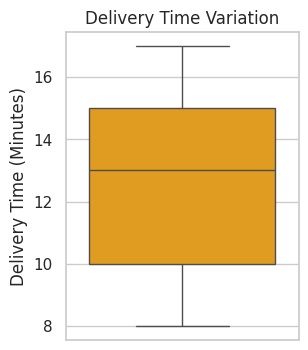

In [89]:
plt.figure(figsize=(3,4))
sns.boxplot(y=df['Delivery_Duration'], color="orange")
plt.ylabel("Delivery Time (Minutes)")
plt.title("Delivery Time Variation")
plt.show()

Total Revenue by Product

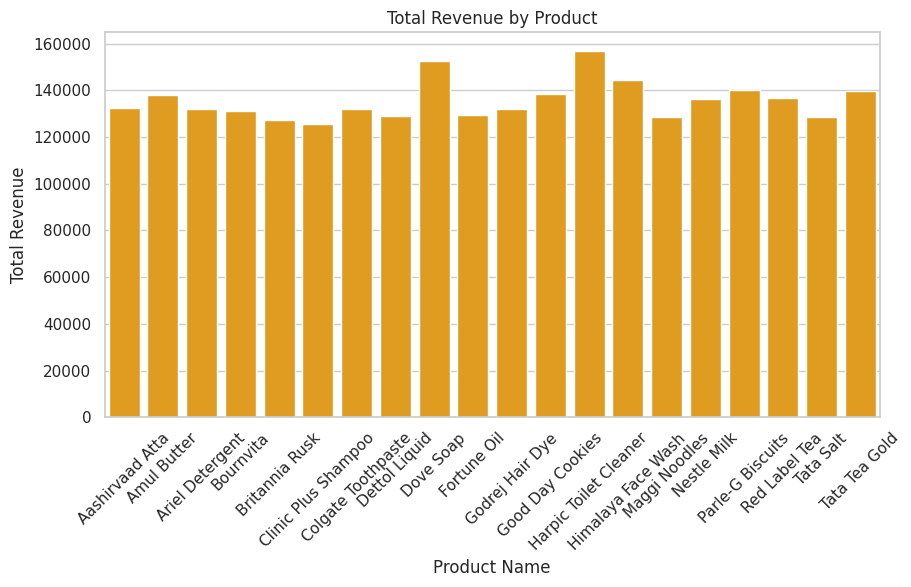

In [90]:
df = pd.DataFrame(order_details_customers)
df['Revenue'] = df['PricePerUnit'] * df['Quantity']
product_revenue = df.groupby('ProductName')['Revenue'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='ProductName', y='Revenue', data=product_revenue, color='orange')
plt.xlabel("Product Name")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Product")
plt.xticks(rotation=45)
plt.show()

Customer Segmentation using KMeans

In [91]:
merged_full = pd.merge(order_details, orders, on="OrderID")
merged_full = pd.merge(merged_full, customers, on="CustomerID")
merged_full["OrderDateTime"] = pd.to_datetime(merged_full["OrderDateTime"])
merged_full["ProductRevenue"] = merged_full["Quantity"] * merged_full["PricePerUnit"]
customer_summary = merged_full.groupby("CustomerID").agg({"ProductRevenue": "sum", "OrderID": "nunique"})
customer_summary.columns = ["TotalRevenue", "TotalOrders"]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_summary)

kmeans = KMeans(n_clusters=4, random_state=42)
customer_summary["Cluster"] = kmeans.fit_predict(scaled_data)
orange_palette = ["#FFE5B4", "#FFB347", "#FF8C00", "#E65100"]
fig = px.scatter(
    customer_summary,
    x="TotalRevenue",
    y="TotalOrders",
    color=customer_summary["Cluster"].astype(str),
    color_discrete_sequence=orange_palette,
    title="Customer Segmentation (KMeans Clustering)",
    labels={"Cluster": "Customer Segment"}
)
fig.update_traces(marker=dict(size=10, line=dict(width=1, color='darkgray')))
fig.update_layout(title_font_size=20, legend_title_text="Cluster", template="simple_white")
fig.show()

Predicting Order Delivery Time (ML Model)

In [92]:
model_data = orders.dropna(subset=["DeliveryDateTime"]).copy()
model_data["OrderDateTime"] = pd.to_datetime(model_data["OrderDateTime"])
model_data["DeliveryDateTime"] = pd.to_datetime(model_data["DeliveryDateTime"])
model_data["DeliveryTimeDays"] = (model_data["DeliveryDateTime"] - model_data["OrderDateTime"]).dt.days

features = pd.get_dummies(model_data[["TotalAmount", "DeliveryStatus"]], drop_first=True)
target = model_data["DeliveryTimeDays"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predictions))
print("R²:", r2_score(y_test, predictions))

MSE: 0.0
R²: 1.0


Time-Series Forecasting on Monthly Order Data

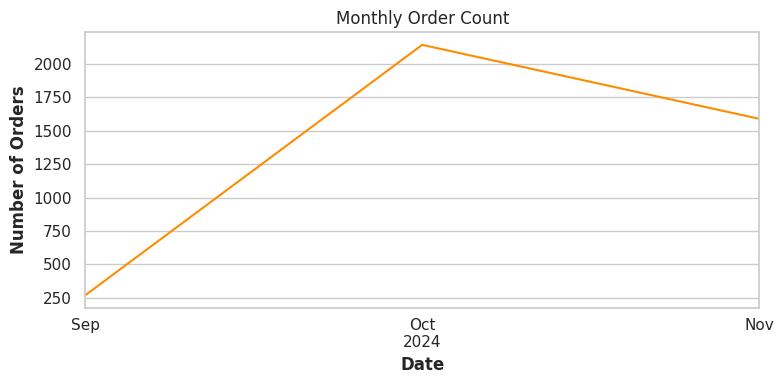

In [93]:
time_series = orders.set_index("OrderDateTime")
monthly_orders = time_series.resample("ME")["OrderID"].count()
monthly_orders.name = "MonthlyOrders"
plt.figure(figsize=(8, 4))
monthly_orders.plot(title="Monthly Order Count", color='#FF8C00')
plt.ylabel("Number of Orders", fontweight='bold')
plt.xlabel("Date", fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



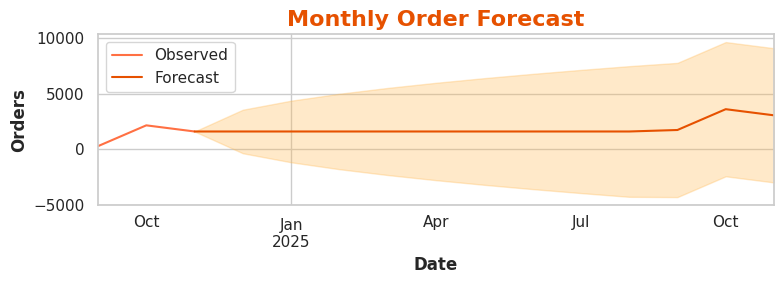

In [94]:
# SARIMA Model
model = SARIMAX(monthly_orders, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
forecast = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(
    start=monthly_orders.index[-1] + pd.DateOffset(months=1),
    periods=12,
    freq='ME'
)
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()
forecast_values.index = forecast_index
forecast_ci.index = forecast_index
forecast_values = pd.concat([monthly_orders[-1:], forecast_values])
forecast_ci = pd.concat([
    pd.DataFrame([[monthly_orders.iloc[-1], monthly_orders.iloc[-1]]],
                 index=[monthly_orders.index[-1]],
                 columns=forecast_ci.columns),
    forecast_ci
])
plt.figure(figsize=(8, 3))
monthly_orders.plot(label='Observed', color='#FF7043')
forecast_values.plot(label='Forecast', color='#E65100')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='#FFB74D', alpha=0.3)
plt.title("Monthly Order Forecast", fontsize=16, fontweight='bold', color='#E65100')
plt.xlabel("Date", fontweight='bold')
plt.ylabel("Orders", fontweight='bold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()